<a href="https://colab.research.google.com/github/mingyeeee/RUhacks2021/blob/main/machine-learning/ChemLabTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras

In [3]:
model = tf.keras.models.load_model('/content/drive/MyDrive/chem model/saved_model/')

# Check its architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1001)              3540265   
_________________________________________________________________
dropout (Dropout)            (None, 1001)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3006      
Total params: 3,543,271
Trainable params: 3,509,159
Non-trainable params: 34,112
_________________________________________________________________


In [5]:
import numpy as np
import matplotlib.pylab as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications.imagenet_utils import decode_predictions

# define a class that load and preprocess one image
def load_process_image(file_path):

  # Load image (in PIL image format by default)
  image_original = load_img(file_path, target_size=(96, 96))
  print("Image size after loading", image_original.size)

  # Convert from numpy array
  image_array = img_to_array(image_original)
  print("Image size after converting to numpy array", image_array.shape)

  # Expand dims to add batch size as 1
  image_batch = np.expand_dims(image_array, axis=0)
  print("Image size after expanding dimension", image_batch.shape)

  # Preprocess image
  image_preprocessed = tf.keras.applications.vgg16.preprocess_input(image_batch)

  return image_original, image_preprocessed

image_file_path = "/content/drive/MyDrive/chem_lab/Hydrogen/H1.jpg"
image_original, image_preprocessed = load_process_image(image_file_path)

Image size after loading (96, 96)
Image size after converting to numpy array (96, 96, 3)
Image size after expanding dimension (1, 96, 96, 3)


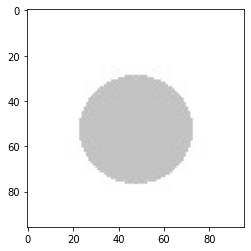

In [6]:
plt.imshow(image_original)

In [7]:
predictions = model.predict(image_preprocessed)

In [8]:
predictions.shape

(1, 3)

In [10]:
predictions

array([[0.97609633, 0.0033923 , 0.02051132]], dtype=float32)